In [1]:
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import statsmodels

In [2]:
from pandas import Series
series = Series.from_csv('champagne.csv', header=0)
split_point = len(series) - 12
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv')
validation.to_csv('validation.csv')

Dataset 94, Validation 12


In [4]:
from sklearn.metrics import mean_squared_error
from math import sqrt
#load data
series = Series.from_csv('dataset.csv')
X=series.values
X=X.astype('float64')
train_size = int(len(X)*0.5)
train, test = X[0:train_size], X[train_size:]

history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
    obs = test[i]
    history.append(obs)
    print('Predicted %.3f, Observed %.3f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

Predicted 8314.000, Observed 10651.000
Predicted 10651.000, Observed 3633.000
Predicted 3633.000, Observed 4292.000
Predicted 4292.000, Observed 4154.000
Predicted 4154.000, Observed 4121.000
Predicted 4121.000, Observed 4647.000
Predicted 4647.000, Observed 4753.000
Predicted 4753.000, Observed 3965.000
Predicted 3965.000, Observed 1723.000
Predicted 1723.000, Observed 5048.000
Predicted 5048.000, Observed 6922.000
Predicted 6922.000, Observed 9858.000
Predicted 9858.000, Observed 11331.000
Predicted 11331.000, Observed 4016.000
Predicted 4016.000, Observed 3957.000
Predicted 3957.000, Observed 4510.000
Predicted 4510.000, Observed 4276.000
Predicted 4276.000, Observed 4968.000
Predicted 4968.000, Observed 4677.000
Predicted 4677.000, Observed 3523.000
Predicted 3523.000, Observed 1821.000
Predicted 1821.000, Observed 5222.000
Predicted 5222.000, Observed 6872.000
Predicted 6872.000, Observed 10803.000
Predicted 10803.000, Observed 13916.000
Predicted 13916.000, Observed 2639.000
Pred

In [6]:
series = Series.from_csv('dataset.csv')
series.describe()

count       94.000000
mean      4666.010638
std       2484.748262
min       1573.000000
25%       3049.000000
50%       4031.500000
75%       5170.250000
max      13916.000000
dtype: float64

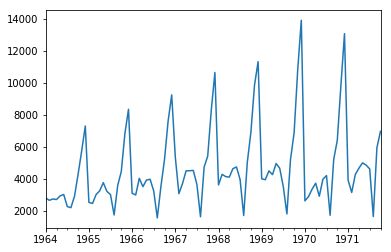

In [7]:
series.plot()
plt.show()

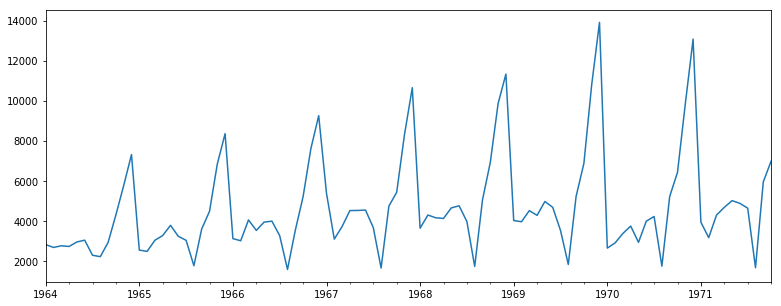

In [8]:
series.plot(figsize=(13,5))
plt.show()

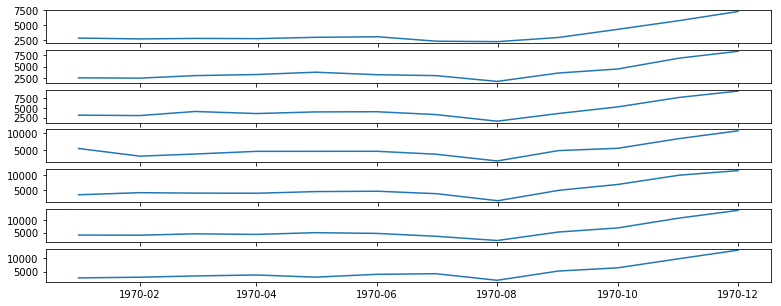

In [11]:
from pandas import DataFrame
from pandas import TimeGrouper

groups = series['1964':'1970'].groupby(TimeGrouper('A'))
years = DataFrame()
plt.figure(figsize=(13,5))
i=1
n_groups = len(groups)
for name, group in groups:
    plt.subplot((n_groups*100) + 10 + i)
    i += 1
    plt.plot(group)
plt.show()

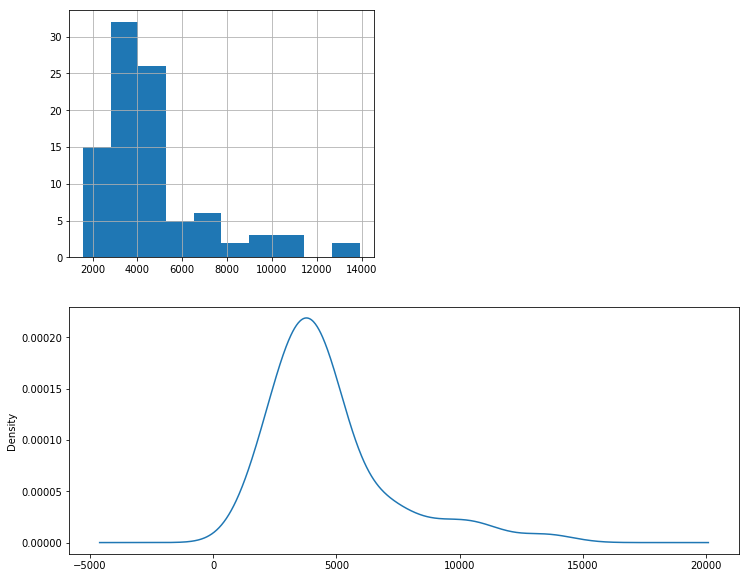

In [15]:
plt.figure(figsize=(12,10))
plt.subplot(221)
series.hist()
plt.subplot(212)
series.plot(kind='kde')
plt.show()

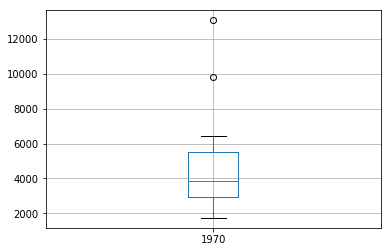

In [24]:
#series = Series.from_csv('dataset.csv')
#groups = series['1964':'1970'].groupby(TimeGrouper('A'))
#years = DataFrame()
#plt.figure(figsize=(15,3))
for names, group in groups:
    years[name.year] = group.values
years.boxplot()
plt.show()

In [25]:
series

1964-01-01     2815.0
1964-02-01     2672.0
1964-03-01     2755.0
1964-04-01     2721.0
1964-05-01     2946.0
1964-06-01     3036.0
1964-07-01     2282.0
1964-08-01     2212.0
1964-09-01     2922.0
1964-10-01     4301.0
1964-11-01     5764.0
1964-12-01     7312.0
1965-01-01     2541.0
1965-02-01     2475.0
1965-03-01     3031.0
1965-04-01     3266.0
1965-05-01     3776.0
1965-06-01     3230.0
1965-07-01     3028.0
1965-08-01     1759.0
1965-09-01     3595.0
1965-10-01     4474.0
1965-11-01     6838.0
1965-12-01     8357.0
1966-01-01     3113.0
1966-02-01     3006.0
1966-03-01     4047.0
1966-04-01     3523.0
1966-05-01     3937.0
1966-06-01     3986.0
               ...   
1969-05-01     4968.0
1969-06-01     4677.0
1969-07-01     3523.0
1969-08-01     1821.0
1969-09-01     5222.0
1969-10-01     6872.0
1969-11-01    10803.0
1969-12-01    13916.0
1970-01-01     2639.0
1970-02-01     2899.0
1970-03-01     3370.0
1970-04-01     3740.0
1970-05-01     2927.0
1970-06-01     3986.0
1970-07-01

In [28]:
from statsmodels.tsa.stattools import adfuller

def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i-interval]
        diff.append(value)
    return Series(diff)

stationary = difference(X, 12)
stationary.index = series.index[12:]
#check if stationary
result = adfuller(stationary)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key,value))

stationary.to_csv('stationary.csv')
plt.show()

ADF Statistic: -7.180580
p-value: 0.000000
Critical Values:
	1%: -3.514
	5%: -2.898
	10%: -2.586


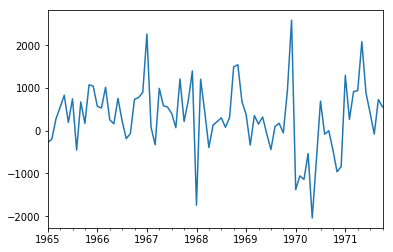

In [29]:
stationary.plot()
plt.show()

In [30]:
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

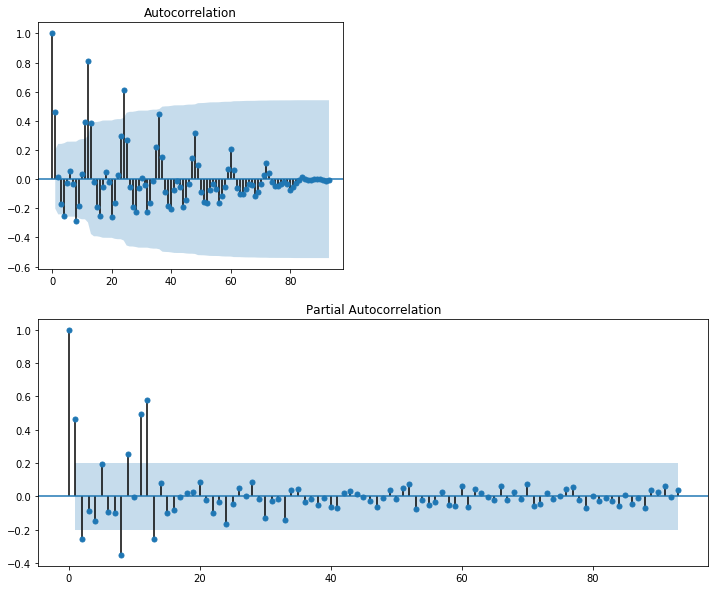

In [32]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure(figsize=(12,10))
plt.subplot(221)
plot_acf(series, ax=plt.gca())
plt.subplot(212)
plot_pacf(series, ax=plt.gca())
plt.show()

In [34]:
from statsmodels.tsa.arima_model import ARIMA

for i in range(len(test)):
    diff = difference(history, 12)
    model = ARIMA(diff, order=(1,1,1))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = model_fit.forecast()[0]
    yhat = inverse_difference(history, yhat, 12)
    predictions.append(yhat)
    obs = test[i]
    history.append(obs)
    print('Predicted=%.3f, Expected=%.3f' % (yhat, obs))
rmse=sqrt(mean_squared_error(test, predictions))
print('RMSE=%.3f' % rmse)

ValueError: Given a pandas object and the index does not contain dates

In [35]:
from pandas import Series
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# load data
series = Series.from_csv('dataset.csv')
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# difference data
	months_in_year = 12
	diff = difference(history, months_in_year)
	# predict
	model = ARIMA(diff, order=(1,1,1))
	model_fit = model.fit(trend='nc', disp=0)
	yhat = model_fit.forecast()[0]
	yhat = inverse_difference(history, yhat, months_in_year)
	predictions.append(yhat)
	# observation
	obs = test[i]
	history.append(obs)
	print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

>Predicted=9742.821, Expected=10651
>Predicted=5986.917, Expected=3633
>Predicted=3887.077, Expected=4292
>Predicted=4038.117, Expected=4154
>Predicted=4992.337, Expected=4121
>Predicted=5156.427, Expected=4647
>Predicted=5046.730, Expected=4753
>Predicted=4143.813, Expected=3965
>Predicted=2102.960, Expected=1723
>Predicted=5228.295, Expected=5048
>Predicted=5873.377, Expected=6922
>Predicted=8571.244, Expected=9858
>Predicted=11006.074, Expected=11331
>Predicted=4087.486, Expected=4016
>Predicted=4771.835, Expected=3957
>Predicted=4676.118, Expected=4510
>Predicted=4583.389, Expected=4276
>Predicted=5117.358, Expected=4968
>Predicted=5208.156, Expected=4677
>Predicted=4436.443, Expected=3523
>Predicted=2180.851, Expected=1821
>Predicted=5471.231, Expected=5222
>Predicted=7337.571, Expected=6872
>Predicted=10268.433, Expected=10803
>Predicted=11725.393, Expected=13916
>Predicted=4519.398, Expected=2639
>Predicted=4605.997, Expected=2899
>Predicted=4939.096, Expected=3370
>Predicted=44

In [36]:
import warnings
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	X = X.astype('float32')
	train_size = int(len(X) * 0.50)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		# difference data
		months_in_year = 12
		diff = difference(history, months_in_year)
		model = ARIMA(diff, order=arima_order)
		model_fit = model.fit(trend='nc', disp=0)
		yhat = model_fit.forecast()[0]
		yhat = inverse_difference(history, yhat, months_in_year)
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	mse = mean_squared_error(test, predictions)
	rmse = sqrt(mse)
	return rmse

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s RMSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

# load dataset
series = Series.from_csv('dataset.csv')
# evaluate parameters
p_values = range(0, 7)
d_values = range(0, 3)
q_values = range(0, 7)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 1) RMSE=933.954
ARIMA(0, 0, 2) RMSE=960.443
ARIMA(0, 0, 3) RMSE=943.894
ARIMA(0, 0, 4) RMSE=957.666
ARIMA(0, 0, 5) RMSE=987.146
ARIMA(0, 0, 6) RMSE=1088.198
ARIMA(0, 1, 1) RMSE=957.959
ARIMA(0, 2, 1) RMSE=1145.504
ARIMA(1, 0, 0) RMSE=941.572
ARIMA(1, 1, 0) RMSE=1070.469
ARIMA(1, 1, 1) RMSE=956.739
ARIMA(1, 2, 0) RMSE=1555.966
ARIMA(2, 0, 0) RMSE=955.363
ARIMA(2, 1, 0) RMSE=1029.710
ARIMA(2, 1, 1) RMSE=980.495
ARIMA(2, 2, 0) RMSE=1346.554
ARIMA(2, 2, 1) RMSE=1039.191
ARIMA(3, 0, 0) RMSE=957.986
ARIMA(3, 1, 0) RMSE=1027.364
ARIMA(3, 1, 1) RMSE=979.387
ARIMA(3, 2, 0) RMSE=1249.541
ARIMA(4, 0, 0) RMSE=967.274
ARIMA(4, 1, 0) RMSE=1045.708
ARIMA(4, 1, 1) RMSE=1005.794
ARIMA(4, 2, 0) RMSE=1229.438
ARIMA(4, 2, 1) RMSE=1054.998
ARIMA(5, 0, 0) RMSE=987.288
ARIMA(5, 1, 0) RMSE=1042.012
ARIMA(5, 1, 1) RMSE=1024.011
ARIMA(5, 2, 1) RMSE=1053.379
ARIMA(6, 0, 0) RMSE=996.320
ARIMA(6, 1, 0) RMSE=1017.993
ARIMA(6, 1, 1) RMSE=1024.031
Best ARIMA(0, 0, 1) RMSE=933.954


                 0
count    47.000000
mean    156.790588
std     930.652823
min   -2164.247449
25%    -289.651667
50%     191.759548
75%     584.888982
max    2367.304868


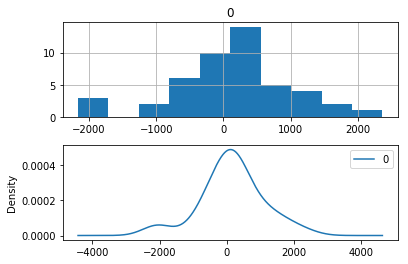

In [37]:
from pandas import Series
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# load data
series = Series.from_csv('dataset.csv')
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# difference data
	months_in_year = 12
	diff = difference(history, months_in_year)
	# predict
	model = ARIMA(diff, order=(0,0,1))
	model_fit = model.fit(trend='nc', disp=0)
	yhat = model_fit.forecast()[0]
	yhat = inverse_difference(history, yhat, months_in_year)
	predictions.append(yhat)
	# observation
	obs = test[i]
	history.append(obs)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# plot
pyplot.figure()
pyplot.subplot(211)
residuals.hist(ax=pyplot.gca())
pyplot.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

RMSE: 920.744
                 0
count    47.000000
mean     -9.114140
std     930.652823
min   -2330.152177
25%    -455.556395
50%      25.854820
75%     418.984254
max    2201.400140


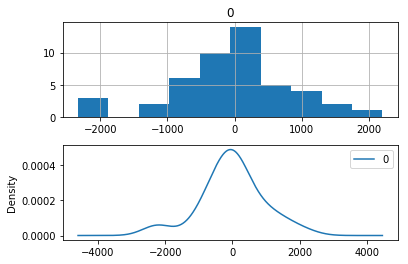

In [38]:
from pandas import Series
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from math import sqrt

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# load data
series = Series.from_csv('dataset.csv')
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
bias = 165.904728
for i in range(len(test)):
	# difference data
	months_in_year = 12
	diff = difference(history, months_in_year)
	# predict
	model = ARIMA(diff, order=(0,0,1))
	model_fit = model.fit(trend='nc', disp=0)
	yhat = model_fit.forecast()[0]
	yhat = bias + inverse_difference(history, yhat, months_in_year)
	predictions.append(yhat)
	# observation
	obs = test[i]
	history.append(obs)
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# plot
pyplot.figure()
pyplot.subplot(211)
residuals.hist(ax=pyplot.gca())
pyplot.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

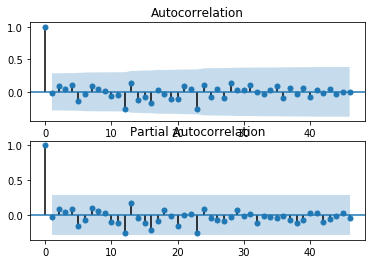

In [39]:
pyplot.figure()
pyplot.subplot(211)
plot_acf(residuals, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(residuals, ax=pyplot.gca())
pyplot.show()

In [40]:
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats import boxcox
import numpy

# monkey patch around bug in ARIMA class
def __getnewargs__(self):
	return ((self.endog),(self.k_lags, self.k_diff, self.k_ma))

ARIMA.__getnewargs__ = __getnewargs__

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff

# load data
series = Series.from_csv('dataset.csv')
# prepare data
X = series.values
X = X.astype('float32')
# difference data
months_in_year = 12
diff = difference(X, months_in_year)
# fit model
model = ARIMA(diff, order=(0,0,1))
model_fit = model.fit(trend='nc', disp=0)
# bias constant, could be calculated from in-sample mean residual
bias = 165.904728
# save model
model_fit.save('model.pkl')
numpy.save('model_bias.npy', [bias])

In [42]:
from pandas import Series
from statsmodels.tsa.arima_model import ARIMAResults

series = Series.from_csv('dataset.csv')
months_in_year = 12
model_fit = ARIMAResults.load('model.pkl')
bias = np.load('model_bias.npy')
yhat = float(model_fit.forecast()[0])
yhat = bias + inverse_difference(series.values, yhat, months_in_year)
print('Predicted=%.3f' % yhat)

Predicted=10101.763


>Predicted=10101.763, Expected=9851
>Predicted=13219.067, Expected=12670
>Predicted=3996.535, Expected=4348
>Predicted=3465.934, Expected=3564
>Predicted=4522.683, Expected=4577
>Predicted=4901.336, Expected=4788
>Predicted=5190.094, Expected=4618
>Predicted=4930.190, Expected=5312
>Predicted=4944.785, Expected=4298
>Predicted=1699.409, Expected=1413
>Predicted=6085.324, Expected=5877
>Predicted=7135.720, Expected=nan


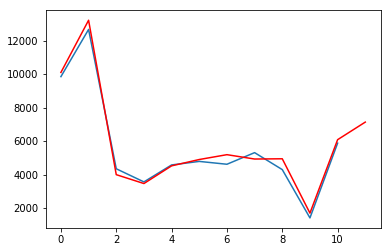

In [44]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# load and prepare datasets
dataset = Series.from_csv('dataset.csv')
X = dataset.values.astype('float32')
history = [x for x in X]
months_in_year = 12
validation = Series.from_csv('validation.csv')
y = validation.values.astype('float32')
# load model
model_fit = ARIMAResults.load('model.pkl')
bias = numpy.load('model_bias.npy')
# make first prediction
predictions = list()
yhat = float(model_fit.forecast()[0])
yhat = bias + inverse_difference(history, yhat, months_in_year)
predictions.append(yhat)
history.append(y[0])
print('>Predicted=%.3f, Expected=%3.f' % (yhat, y[0]))
# rolling forecasts
for i in range(1, len(y)):
	# difference data
	months_in_year = 12
	diff = difference(history, months_in_year)
	# predict
	model = ARIMA(diff, order=(0,0,1))
	model_fit = model.fit(trend='nc', disp=0)
	yhat = model_fit.forecast()[0]
	yhat = bias + inverse_difference(history, yhat, months_in_year)
	predictions.append(yhat)
	# observation
	obs = y[i]
	history.append(obs)
	print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
# report performance
#mse = mean_squared_error(y, predictions)
#rmse = sqrt(mse)
#print('RMSE: %.3f' % rmse)
pyplot.plot(y)
pyplot.plot(predictions, color='red')
pyplot.show()